In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras import models
from keras import layers

In [3]:
from keras.datasets import imdb

In [4]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [5]:
print(training_data.shape)
print(training_targets.shape)

print(testing_data.shape)
print(testing_targets.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [6]:
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [7]:
print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 9998


In [8]:
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173.0


In [9]:
print("Label:", targets[0])

Label: 1


In [10]:
print(data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [11]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded) 

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [12]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
 
data = vectorize(data)
targets = np.array(targets).astype("float32")

In [13]:
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]

In [14]:
def Model():
    from keras import models
    model = models.Sequential()
    # Input - Layer
    model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
    # Hidden - Layers
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(50, activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(50, activation = "relu"))
    # Output- Layer
    model.add(layers.Dense(1, activation = "sigmoid"))
    
    return model

In [16]:
model = Model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                500050    
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 505,201
Trainable params: 505,201
Non-trainable params: 0
_________________________________________________________________


In [17]:
epochs = [20, 25, 30, 35]
optimizers = ["adam", "sgd", "rmsprop", "adagrad"]
models_history = {}
loss_acc = {}

for optim in optimizers:
    for epoch in epochs:
        model = Model()
        model.compile(
                     optimizer = optim,
                     loss = "binary_crossentropy",
                     metrics = ["accuracy"]
                     )

        history = model.fit(
                             train_x, train_y,
                             epochs= epoch,
                             batch_size = 500,
                             validation_data = (test_x, test_y)
                            )
        
        models_history[optim + "_" + str(epoch)] = history
        loss_acc[optim + "_" + str(epoch)] = model.evaluate(test_x, test_y)

W1011 03:00:42.076238 140583220905792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1011 03:00:42.093195 140583220905792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1011 03:00:42.098899 140583220905792 deprecation.py:323] From /home/snow/.local/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 4s 106us/step - loss: 0.3986 - acc: 0.8248 - val_loss: 0.2620 - val_acc: 0.8960
Epoch 2/20
40000/40000 [==============================] - 3s 71us/step - loss: 0.2133 - acc: 0.9191 - val_loss: 0.2627 - val_acc: 0.8933
Epoch 3/20
40000/40000 [==============================] - 3s 71us/step - loss: 0.1558 - acc: 0.9435 - val_loss: 0.2823 - val_acc: 0.8921
Epoch 4/20
40000/40000 [==============================] - 3s 72us/step - loss: 0.1075 - acc: 0.9639 - val_loss: 0.3373 - val_acc: 0.8850
Epoch 5/20
40000/40000 [==============================] - 3s 72us/step - loss: 0.0763 - acc: 0.9744 - val_loss: 0.3878 - val_acc: 0.8860
Epoch 6/20
40000/40000 [==============================] - 3s 73us/step - loss: 0.0559 - acc: 0.9811 - val_loss: 0.4578 - val_acc: 0.8847
Epoch 7/20
40000/40000 [==============================] - 3s 73us/step - loss: 0.0455 - acc: 0.9838 - val_loss: 0.5118 - val_ac

40000/40000 [==============================] - 3s 68us/step - loss: 0.0200 - acc: 0.9929 - val_loss: 0.6389 - val_acc: 0.8769
Epoch 14/30
40000/40000 [==============================] - 3s 67us/step - loss: 0.0190 - acc: 0.9933 - val_loss: 0.6728 - val_acc: 0.8787
Epoch 15/30
40000/40000 [==============================] - 3s 67us/step - loss: 0.0213 - acc: 0.9920 - val_loss: 0.6179 - val_acc: 0.8785
Epoch 16/30
40000/40000 [==============================] - 3s 68us/step - loss: 0.0232 - acc: 0.9914 - val_loss: 0.6018 - val_acc: 0.8799
Epoch 17/30
40000/40000 [==============================] - 3s 68us/step - loss: 0.0199 - acc: 0.9930 - val_loss: 0.6407 - val_acc: 0.8798
Epoch 18/30
40000/40000 [==============================] - 3s 70us/step - loss: 0.0185 - acc: 0.9933 - val_loss: 0.6265 - val_acc: 0.8780
Epoch 19/30
40000/40000 [==============================] - 3s 67us/step - loss: 0.0166 - acc: 0.9938 - val_loss: 0.6960 - val_acc: 0.8787
Epoch 20/30
40000/40000 [=====================

Epoch 6/20
40000/40000 [==============================] - 3s 63us/step - loss: 0.6527 - acc: 0.6670 - val_loss: 0.6287 - val_acc: 0.7645
Epoch 7/20
40000/40000 [==============================] - 3s 63us/step - loss: 0.6321 - acc: 0.6906 - val_loss: 0.5988 - val_acc: 0.7815
Epoch 8/20
40000/40000 [==============================] - 3s 63us/step - loss: 0.6073 - acc: 0.7119 - val_loss: 0.5626 - val_acc: 0.7932
Epoch 9/20
40000/40000 [==============================] - 3s 63us/step - loss: 0.5768 - acc: 0.7333 - val_loss: 0.5229 - val_acc: 0.8047
Epoch 10/20
40000/40000 [==============================] - 3s 63us/step - loss: 0.5439 - acc: 0.7538 - val_loss: 0.4846 - val_acc: 0.8124
Epoch 11/20
40000/40000 [==============================] - 2s 62us/step - loss: 0.5133 - acc: 0.7706 - val_loss: 0.4513 - val_acc: 0.8227
Epoch 12/20
40000/40000 [==============================] - 3s 63us/step - loss: 0.4846 - acc: 0.7879 - val_loss: 0.4240 - val_acc: 0.8298
Epoch 13/20
40000/40000 [=============

Epoch 19/30
40000/40000 [==============================] - 3s 63us/step - loss: 0.3561 - acc: 0.8528 - val_loss: 0.3259 - val_acc: 0.8650
Epoch 20/30
40000/40000 [==============================] - 3s 63us/step - loss: 0.3462 - acc: 0.8566 - val_loss: 0.3206 - val_acc: 0.8668
Epoch 21/30
40000/40000 [==============================] - 3s 65us/step - loss: 0.3384 - acc: 0.8611 - val_loss: 0.3149 - val_acc: 0.8707
Epoch 22/30
40000/40000 [==============================] - 3s 63us/step - loss: 0.3296 - acc: 0.8651 - val_loss: 0.3111 - val_acc: 0.8713
Epoch 23/30
40000/40000 [==============================] - 3s 63us/step - loss: 0.3222 - acc: 0.8680 - val_loss: 0.3066 - val_acc: 0.8726
Epoch 24/30
40000/40000 [==============================] - 3s 63us/step - loss: 0.3166 - acc: 0.8715 - val_loss: 0.3035 - val_acc: 0.8735
Epoch 25/30
40000/40000 [==============================] - 3s 63us/step - loss: 0.3084 - acc: 0.8760 - val_loss: 0.2991 - val_acc: 0.8765
Epoch 26/30
40000/40000 [=========

Epoch 12/20
40000/40000 [==============================] - 3s 69us/step - loss: 0.0353 - acc: 0.9906 - val_loss: 0.7023 - val_acc: 0.8828
Epoch 13/20
40000/40000 [==============================] - 3s 65us/step - loss: 0.0350 - acc: 0.9906 - val_loss: 0.6809 - val_acc: 0.8805
Epoch 14/20
40000/40000 [==============================] - 3s 67us/step - loss: 0.0295 - acc: 0.9918 - val_loss: 0.7158 - val_acc: 0.8758
Epoch 15/20
40000/40000 [==============================] - 3s 65us/step - loss: 0.0251 - acc: 0.9930 - val_loss: 0.7201 - val_acc: 0.8816
Epoch 16/20
40000/40000 [==============================] - 3s 65us/step - loss: 0.0255 - acc: 0.9933 - val_loss: 0.7463 - val_acc: 0.8795
Epoch 17/20
40000/40000 [==============================] - 3s 65us/step - loss: 0.0254 - acc: 0.9933 - val_loss: 0.7528 - val_acc: 0.8780
Epoch 18/20
40000/40000 [==============================] - 3s 65us/step - loss: 0.0236 - acc: 0.9939 - val_loss: 0.7214 - val_acc: 0.8780
Epoch 19/20
40000/40000 [=========

Epoch 25/30
40000/40000 [==============================] - 3s 65us/step - loss: 0.0163 - acc: 0.9959 - val_loss: 0.7972 - val_acc: 0.8782
Epoch 26/30
40000/40000 [==============================] - 3s 65us/step - loss: 0.0173 - acc: 0.9955 - val_loss: 0.7800 - val_acc: 0.8769
Epoch 27/30
40000/40000 [==============================] - 3s 65us/step - loss: 0.0163 - acc: 0.9961 - val_loss: 0.8697 - val_acc: 0.8711
Epoch 28/30
40000/40000 [==============================] - 3s 65us/step - loss: 0.0161 - acc: 0.9960 - val_loss: 0.8445 - val_acc: 0.8749
Epoch 29/30
40000/40000 [==============================] - 3s 65us/step - loss: 0.0145 - acc: 0.9966 - val_loss: 0.8719 - val_acc: 0.8742
Epoch 30/30
10000/10000 [==============================] - 1s 64us/step
Train on 40000 samples, validate on 10000 samples
Epoch 1/35
40000/40000 [==============================] - 3s 86us/step - loss: 0.3982 - acc: 0.8259 - val_loss: 0.2685 - val_acc: 0.8925
Epoch 2/35
40000/40000 [===========================

Epoch 18/20
40000/40000 [==============================] - 3s 64us/step - loss: 0.0090 - acc: 0.9969 - val_loss: 0.6836 - val_acc: 0.8859
Epoch 19/20
40000/40000 [==============================] - 3s 67us/step - loss: 0.0083 - acc: 0.9971 - val_loss: 0.6756 - val_acc: 0.8841
Epoch 20/20
10000/10000 [==============================] - 1s 72us/step
Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 4s 103us/step - loss: 0.3920 - acc: 0.8214 - val_loss: 0.2564 - val_acc: 0.8970
Epoch 2/25
40000/40000 [==============================] - 3s 77us/step - loss: 0.2156 - acc: 0.9174 - val_loss: 0.2655 - val_acc: 0.8941
Epoch 3/25
40000/40000 [==============================] - 3s 78us/step - loss: 0.1651 - acc: 0.9394 - val_loss: 0.2763 - val_acc: 0.8965
Epoch 4/25
40000/40000 [==============================] - 3s 75us/step - loss: 0.1266 - acc: 0.9551 - val_loss: 0.3143 - val_acc: 0.8935
Epoch 5/25
40000/40000 [=============================

10000/10000 [==============================] - 1s 79us/step
Train on 40000 samples, validate on 10000 samples
Epoch 1/35
40000/40000 [==============================] - 4s 99us/step - loss: 0.3874 - acc: 0.8234 - val_loss: 0.2582 - val_acc: 0.8950
Epoch 2/35
40000/40000 [==============================] - 3s 70us/step - loss: 0.2118 - acc: 0.9187 - val_loss: 0.2620 - val_acc: 0.8979
Epoch 3/35
40000/40000 [==============================] - 3s 72us/step - loss: 0.1635 - acc: 0.9397 - val_loss: 0.2840 - val_acc: 0.8954
Epoch 4/35
40000/40000 [==============================] - 3s 71us/step - loss: 0.1285 - acc: 0.9542 - val_loss: 0.3079 - val_acc: 0.8936
Epoch 5/35
40000/40000 [==============================] - 3s 72us/step - loss: 0.1016 - acc: 0.9648 - val_loss: 0.3347 - val_acc: 0.8916
Epoch 6/35
40000/40000 [==============================] - 3s 82us/step - loss: 0.0821 - acc: 0.9731 - val_loss: 0.3824 - val_acc: 0.8880
Epoch 7/35
40000/40000 [==============================] - 3s 77us/st

In [18]:
models_history

{'adam_20': <keras.callbacks.History at 0x7fdbbe42cf98>,
 'adam_25': <keras.callbacks.History at 0x7fdbc251d4e0>,
 'adam_30': <keras.callbacks.History at 0x7fdbc1ffb940>,
 'adam_35': <keras.callbacks.History at 0x7fdbc1ae4eb8>,
 'sgd_20': <keras.callbacks.History at 0x7fdbc1532f28>,
 'sgd_25': <keras.callbacks.History at 0x7fdbc11d2a90>,
 'sgd_30': <keras.callbacks.History at 0x7fdbc0df3550>,
 'sgd_35': <keras.callbacks.History at 0x7fdbc0a94a90>,
 'rmsprop_20': <keras.callbacks.History at 0x7fdbc06b4ba8>,
 'rmsprop_25': <keras.callbacks.History at 0x7fdbc02dc780>,
 'rmsprop_30': <keras.callbacks.History at 0x7fdbbc80beb8>,
 'rmsprop_35': <keras.callbacks.History at 0x7fdbbb421a58>,
 'adagrad_20': <keras.callbacks.History at 0x7fdbba66eba8>,
 'adagrad_25': <keras.callbacks.History at 0x7fdbba0f9f60>,
 'adagrad_30': <keras.callbacks.History at 0x7fdac03a59b0>,
 'adagrad_35': <keras.callbacks.History at 0x7fda83d44cf8>}

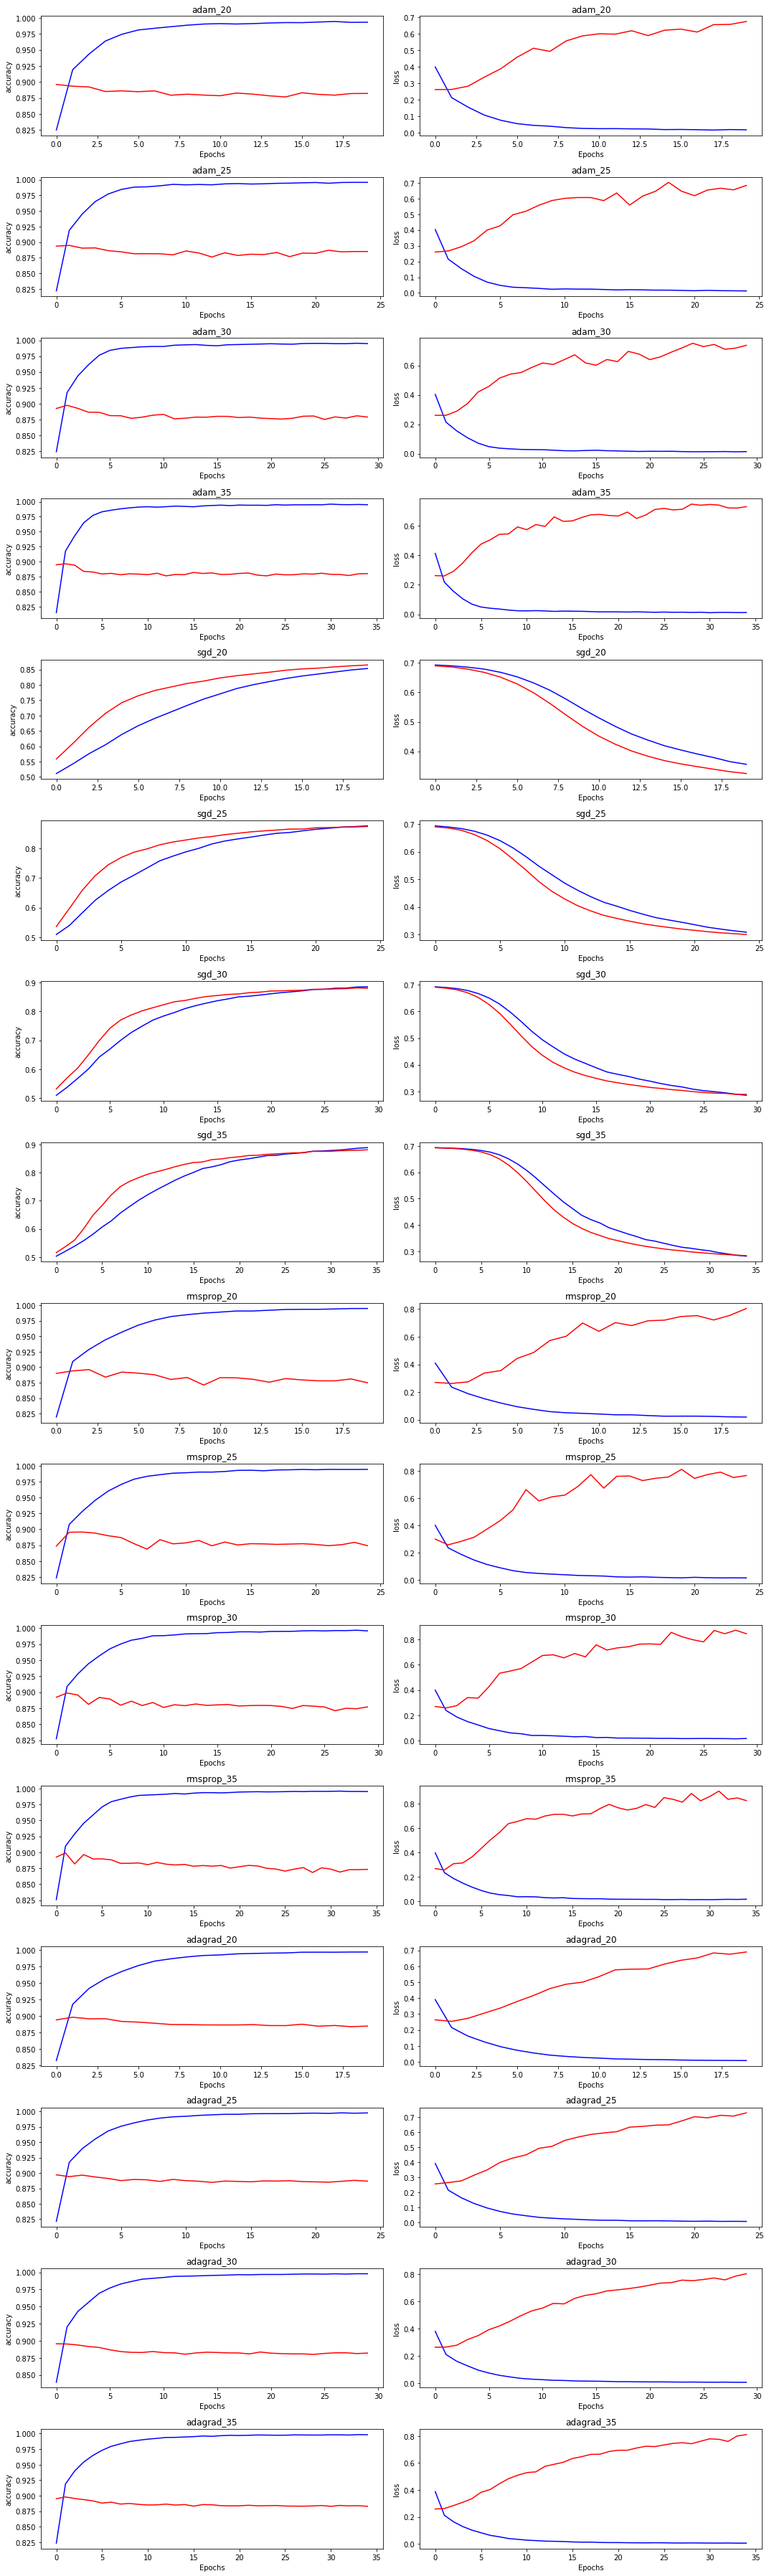

In [19]:
i = 1
plt.figure(figsize=(15,50))
for model_hist in models_history:
    n_epochs = range(int(model_hist.split("_")[1]))
    
    plt.subplot(16, 2, i)
    plt.plot(n_epochs, models_history[model_hist].history["acc"] , 'b')
    plt.plot(n_epochs, models_history[model_hist].history["val_acc"], 'r')
    plt.xlabel("Epochs")
    plt.ylabel("accuracy")
    plt.title(model_hist)
    
    plt.subplot(16, 2, i+1)
    plt.plot(n_epochs, models_history[model_hist].history["loss"], 'b')
    plt.plot(n_epochs, models_history[model_hist].history["val_loss"], 'r')    
    plt.xlabel("Epochs")
    plt.ylabel('loss')
    plt.title(model_hist)
    
    i += 2
plt.tight_layout()
plt.savefig("experiments.png")
plt.show()

In [31]:
loss_acc

{'adam_20': [0.6736813831929117, 0.882],
 'adam_25': [0.6827657131016255, 0.885],
 'adam_30': [0.7375973019868135, 0.8788],
 'adam_35': [0.7279370287060738, 0.88],
 'sgd_20': [0.32470809826850894, 0.8648],
 'sgd_25': [0.3004533381462097, 0.8745],
 'sgd_30': [0.2887876854658127, 0.8806],
 'sgd_35': [0.2841552095413208, 0.8817],
 'rmsprop_20': [0.8045993952751159, 0.8749],
 'rmsprop_25': [0.7676487742871047, 0.8743],
 'rmsprop_30': [0.8442587231181562, 0.8771],
 'rmsprop_35': [0.826695932969451, 0.8733],
 'adagrad_20': [0.6897064138123765, 0.885],
 'adagrad_25': [0.7279227746281773, 0.8867],
 'adagrad_30': [0.803537658973597, 0.882],
 'adagrad_35': [0.8101298601870425, 0.8828]}

In [32]:
import pandas as pd

df = pd.DataFrame()
df["optimizer"] = [i.split("_")[0] for i in models_history]
df["epochs"] = [i.split("_")[1] for i in models_history]
df["Test Accuracy"] = [i[1] for i in loss_acc.values()]
df

,optimizer,epochs,Test Accuracy
0,adam,20,0.8820
1,adam,25,0.8850
2,adam,30,0.8788
3,adam,35,0.8800
4,sgd,20,0.8648
5,sgd,25,0.8745
6,sgd,30,0.8806
7,sgd,35,0.8817
8,rmsprop,20,0.8749
9,rmsprop,25,0.8743
